## Tarea 1 del curso CM-072

* Nombre y apellidos: Kevin Daniel Molina Bejar
* Fecha de presentación: 11 de setiembre.

## Lista de preguntas:

1 . Responde de acuerdo a los conceptos hechos en clase las siguientes preguntas:
   * Supongamos que tenemos la tarea de construir un sistema que pueda distinguir  correo no deseado o spam. ¿Qué crees que hay en un correo electrónico no deseado que nos permite saber que es spam? ¿Cómo puede la computadora detectar spam a través de un análisis sintáctico?. ¿Qué te gustaría que hiciera la computadora si detecta un correo electrónico que es spam?, ¿eliminarlo automáticamente, moverlo a un archivo diferente o simplemente resaltarlo en la pantalla?.
   
   * ¿Cómo se puede predecir el siguiente comando a ser escrito por un usuario? ¿O la próxima página de la que descargará información en la Web? ¿Cuándo sería útil tal predicción? ¿Cuándo no?.

# Respuesta (en clase)
 * Coleccionando los correos podemos ver cuales son las palabras que más repiten y clasificarlo como spam segun las que tengan mayor frecuencia. La computadora deberia resaltarlo en pantalla como spam.
 * Basandose en el historial de comandos usados asi como las paginas web navegadas se puede predecir el siguiente comando o pagina web de cada usuario. Siempre es útil.

2 . ¿Puedes predecir las especies de un iris usando medidas de pétalos y sépalos?

   * Lee los datos del conjunto predeterminado `iris` en un DataFrame de Pandas, incluyendo los nombres de las columnas.
   * Recolecta  información básica sobre los datos `iris`  utilizando pandas.
   * Utiliza la clasificación, [dividir-aplicar-combinar](https://pandas.pydata.org/pandas-docs/version/0.23.4/groupby.html) y  visualización para buscar las diferencias entre las especies.

   * Escribe un conjunto de reglas que podrían usarse para predecir especies en base a las mediciones de iris.
   * Define una función que acepte una fila de datos y devuelva una especie pronosticada. Luego, usa esa función para hacer predicciones para todas las filas de datos existentes y verifique la precisión de sus predicciones.


In [2]:
# Tu solucion
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
#leyendo datos
iris= load_iris()
#utilizando pandas
iris_dataframe = pd.DataFrame(np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['species'])
#diferencia entre especies
iris_dataframe.groupby('species').mean()
#reglas:
#Si la longitud del pétalo es menor que 3, predice setosa.
#Sino si el ancho del pétalo es inferior a 1,8, predice versicolor.
#Sino virginica.

#funcion:
def clasificando(fila):
    if fila[2] < 3:          
        return 0    # setosa
    elif fila[3] < 1.8:      
        return 1    # versicolor
    else:
        return 2    # virginica

# prediccion
clasificando(iris_dataframe.iloc[0, :])      
clasificando(iris_dataframe.iloc[149, :])    
# guardando las predicciones
prediccion = [clasificando(row) for row in iris_dataframe.values]

# presicion
np.mean(iris_dataframe.species == prediccion) 


0.96

3 . Sea el siguiente código de generación de datos:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

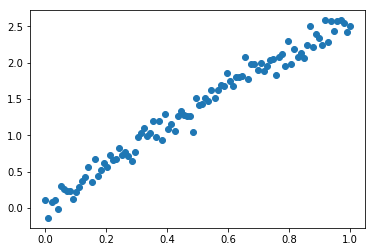

In [4]:
# Recolectamos datos artificiales
n = 100
x = np.linspace(0, 1, n)
y = np.sin(x)*3 + np.random.normal(0, 0.1, n)
plt.plot(x, y, 'o');

Usando los siguientes datos y scikit learn, desarrolla los siguientes pasos descritos en clase, para una regresión lineal:

* Escoger un modelo
* Elegir modelo de hiperparámetros
* Organiza los datos en una matriz de características y vector objetivo.
* Fija el modelo a tus datos.
* Predecir etiquetas para datos desconocidos.

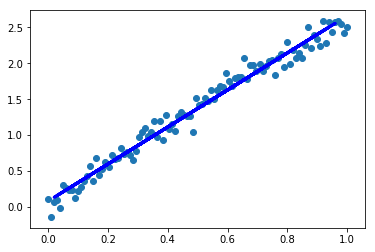

In [5]:
# Tu respuesta
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#modelo
lr = linear_model.LinearRegression()
#separar los datos en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(x, y, random_state=0)
X_entrenamiento=X_entrenamiento.reshape(-1,1)
X_prueba=X_prueba.reshape(-1,1)
#fijar el modelo
lr.fit(X_entrenamiento, y_entrenamiento)
#predecir
y_predic= lr.predict(X_prueba)
#graficar
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(X_prueba, y_predic,color='blue', linewidth=3)
plt.show()

4 . Realiza los mismos pasos para el conjunto  de datos de scikit learn  [load_diabetes](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html). 

In [6]:
from sklearn.datasets import load_diabetes
data = load_diabetes()

In [7]:
data.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [8]:
print(data['DESCR'])

Diabetes dataset

Notes
-----

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

Data Set Characteristics:

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attributes:
    :Age:
    :Sex:
    :Body mass index:
    :Average blood pressure:
    :S1:
    :S2:
    :S3:
    :S4:
    :S5:
    :S6:

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani

In [9]:
X = data['data']
y = data['target']
X.shape, y.shape

((442, 10), (442,))

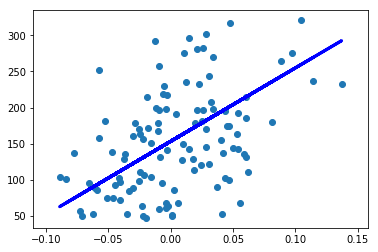

In [10]:
# Tu solucion
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#modelo
lr = linear_model.LinearRegression()
#separar los datos en entrenamiento y prueba
X=X[:, np.newaxis, 2]
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, random_state=0)
#fijar el modelo
lr.fit(X_entrenamiento, y_entrenamiento)
#predecir
y_predic= lr.predict(X_prueba)
#graficar
fig, ax = plt.subplots()
ax.scatter(X_prueba,y_prueba)
ax.plot(X_prueba, y_predic,color='blue', linewidth=3)
plt.show()

5 (Obligatoria). Lee el siguiente artículo [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html), responde las siguientes preguntas:

* En el ejemplo Party Registration, ¿cuáles son las características? ¿Cuál es la respuesta? ¿Es  un problema de regresión o clasificación?.

* Conceptualmente, ¿cómo se aplica KNN a este problema para hacer una predicción?
* ¿Cómo se relacionan las cuatro visualizaciones en la sección 3 entre sí?. Cambia el valor de **k** utilizando el control deslizante y explica por que  cambió  las visualizaciones.
* En las figuras 4 y 5, ¿qué significan los colores más claros en comparación con los colores más oscuros? ¿Cómo se calcula la oscuridad?

* ¿Qué representa la línea negra en la figura 5? ¿Qué predicciones haría el mejor modelo de aprendizaje automático con respecto a esta línea?

* Elije un valor pequeño para `k` y haz clic en el botón `Generate New Training Data` varias veces. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?

* Repite este procedimiento con un valor muy grande de `k`. ¿Observas "baja varianza o alta varianza, bajo sesgo o alto sesgo?.

* Utiliza otros valores de `k`. ¿Qué valor crees que es "mejor"? ¿Cómo defines "mejor"?.

* ¿Un pequeño valor de `k` produce "overfitting" o "underfitting"? y ¿por qué?.

* ¿Por qué debería importarnos la varianza? ¿No deberíamos minimizar el sesgo e ignorar la varianza?.

# Respuestas
 * Las caracteristicas son: riqueza y religiosidad ; la respuesta: democratas o republicanos; es un problema de clasificación.
 * Dependiendo de la regiliosidad y su riqueza con la distancia a la region mas cercana se predice su voto.
 * El aumento de k resulta en promedios de más votantes en cada predicción. Esto da como resultado curvas de predicción más suaves
 * Los colores más claros indican menos certeza sobre las predicciones.
 * La curva negra representa las zonas de clasificacion hallada. Con respecto a esta linea se predice si es republicano o democrata.
 * Un bajo k aumentará la varianza y disminuirá el sesgo.
 * Un alto k disminuirá la varianza pero aumentará el sesgo.
 * k=31. Decimos mejor porque observamos un equilibrio entre el sesgo y la variancia
 * Un pequeño k produce overfitting,podemos ver pequeñas islas de republicanos en los democratas y viceversa. 
 * No se debe de ignorar ni el sesgo ni la varianza ya que el error total depende de ambos.